In [1]:
# Dependencies and Setup
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

#ignore warnings
warnings.filterwarnings('ignore')

# Study data files
mouse_metadata_path = "Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results:
#mouse_metadata
mouse_metadata=pd.read_csv(mouse_metadata_path)
#study_results
study_results=pd.read_csv(study_results_path)

In [2]:
# Show the mouse data 
mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
#Show the study results
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the Data in a sigle dataset 
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Display the number of unique mice ID
num_mice = combined_df["Mouse ID"].nunique()
num_mice

249

In [6]:
dup_mice = combined_df[combined_df.duplicated()]
dup_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates()
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df["Mouse ID"].nunique()
clean_mice

249

In [9]:
# double check
dup_mice_2 = clean_df[clean_df.duplicated()]
dup_mice_2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


# Summary Statistics

In [10]:
#Use groupby methods
groupby_df = clean_df.groupby(['Drug Regimen'])
groupby_df.count()

# Calculations
mean = groupby_df['Tumor Volume (mm3)'].mean()
median = groupby_df['Tumor Volume (mm3)'].median()
variance = groupby_df['Tumor Volume (mm3)'].var()
std_deviation = groupby_df['Tumor Volume (mm3)'].std()
sem = groupby_df['Tumor Volume (mm3)'].sem()

# Summary df
summary_table = pd.DataFrame({
    "Mean Volume" : mean,
    "Median volume" : median,
    "Variance Volume" : variance,
    "Std Deviation Volume" : std_deviation,
    "SEM Volume" : sem
})

summary_table

,Mean Volume,Median volume,Variance Volume,Std Deviation Volume,SEM Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Create Bar Chart

In [11]:
#Count data in each drug regimen
mice_number = groupby_df["Drug Regimen"].count().sort_values(ascending=False)
mice_number

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     160
Name: Drug Regimen, dtype: int64

Text(0.5, 1.0, 'Number of Mice per Treatment')

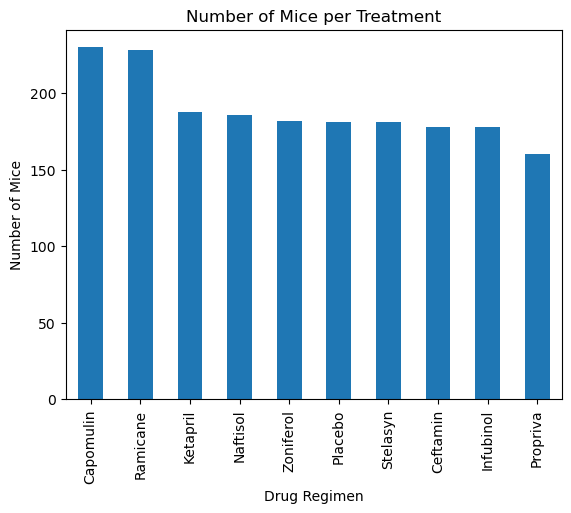

In [12]:
# Create a Pandas bar plot based off of the group series from before and label the title
bar_plot = mice_number.plot.bar()  
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

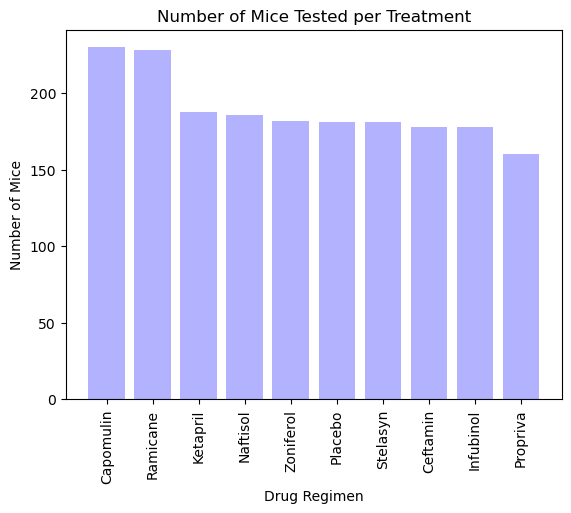

In [13]:
# Generate a pyplot bar chart.
x_axis = mice_number.index.values
y_axis = mice_number.values

# Chart format and labels
plt.bar(x_axis, y_axis, color='b', alpha=0.3, align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice Tested per Treatment")
plt.xticks(rotation="vertical")
plt.show()


# Create Pie Chart

In [14]:
# Extract total amount of mice in the study by its ID:
#total_mouse_count
total_mouse=clean_df['Mouse ID'].nunique()

#Extract amount of female and male mice:
total_female=clean_df.loc[clean_df['Sex']=='Female',:].nunique().iloc[0]
total_male=clean_df.loc[clean_df['Sex']=='Male',:].nunique().iloc[0]

# Percentage of male and female mice in the study:
male_perc = (total_male/total_mouse)*100
female_perc = (total_female/total_mouse)*100

# Create data frame for female and male mice distribution:
mice_sex_df = pd.DataFrame({
    'Sex': [male_perc, female_perc]},
    index=['Male','Female'])

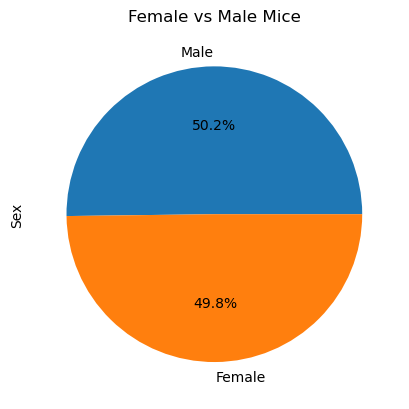

In [15]:
# Generate a pandas pie plot showing the distribution of female versus male mice.
pandas_pie = mice_sex_df.plot.pie(y='Sex', autopct="%1.1f%%")

# Chart format and labels
pandas_pie.set_title('Female vs Male Mice')
plt.legend('',frameon=False)


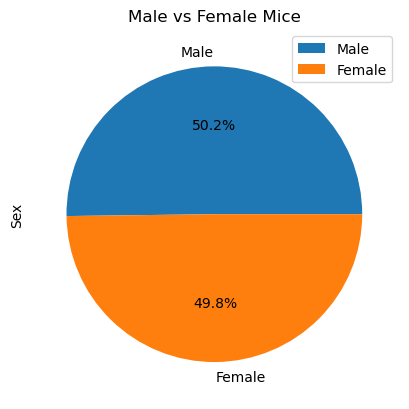

In [16]:
# Generate a pyplot pie chart
labels = ['Female', 'Male']
plot = mice_sex_df.plot.pie(y='Sex', autopct="%1.1f%%")
plt.title('Male vs Female Mice')
plt.ylabel('Sex')
plt.show()

# Calculate Quartiles, Find Outliers, and Create a Box Plot

In [17]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

In [18]:
# Start by getting the last (greatest) timepoint for each mouse
# Capomulin
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin regimen tumors: {lowerq}")
print(f"The upper quartile of Capomulin regimen tumors: {upperq}")
print(f"The interquartile range of Capomulin regimen tumors: {iqr}")
print(f"The median of Capomulin regimen tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin regimen tumors: 32.37735684
The upper quartile of Capomulin regimen tumors: 40.1592203
The interquartile range of Capomulin regimen tumors: 7.781863460000004
The median of Capomulin regimen tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [19]:
# Ramicane
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane regimen tumors: {lowerq}")
print(f"The upper quartile of Ramicane regimen tumors: {upperq}")
print(f"The interquartile range of Ramicane regimen tumors: {iqr}")
print(f"The median of Ramicane regimen tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane regimen tumors: 31.56046955
The upper quartile of Ramicane regimen tumors: 40.65900627
The interquartile range of Ramicane regimen tumors: 9.098536719999998
The median of Ramicane regimen tumors: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [20]:
# Infubinol 
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

quartiles =Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol regimen tumors: {lowerq}")
print(f"The upper quartile of Infubinol regimen tumors: {upperq}")
print(f"The interquartile range of Infubinol regimen tumors: {iqr}")
print(f"The median of Infubinol regimen tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol regimen tumors: 54.04860769
The upper quartile of Infubinol regimen tumors: 65.52574285
The interquartile range of Infubinol regimen tumors: 11.477135160000003
The median of Infubinol regimen tumors: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [21]:
# Ceftamin
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftalim regimen tumors: {lowerq}")
print(f"The upper quartile of Ceftalim regimen tumors: {upperq}")
print(f"The interquartile range of Ceftalim regimen tumors: {iqr}")
print(f"The the median of Ceftalim regimen tumors: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftalim regimen tumors: 48.72207785
The upper quartile of Ceftalim regimen tumors: 64.29983003
The interquartile range of Ceftalim regimen tumors: 15.577752179999997
The the median of Ceftalim regimen tumors: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


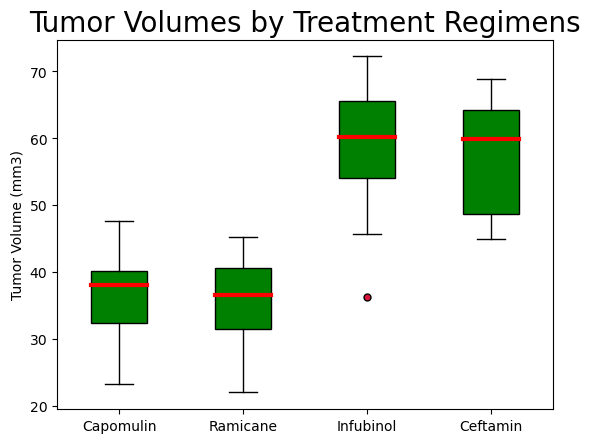

In [22]:
# Combine final tumor volumes data for 4 top treatments into a list: 
volumes=[Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]

# Outliers plot of the final tumor volumes:
fig, ax=plt.subplots(1,)
bp=ax.boxplot(volumes, patch_artist=True)
ax.set_title('Tumor Volumes by Treatment Regimens', fontsize=20)
ax.set_ylabel('Tumor Volume (mm3)', fontsize=10, color='black')
ax.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], fontsize=10, color='black')

# Change fill color:
for box in bp['boxes']:
    box.set(facecolor='green')

# Change color and linewidth of the medians:
for median in bp['medians']:
    median.set(color='Red', linewidth=3)

# Change the fill and style of fliers:
for flier in bp['fliers']:
    flier.set(marker='o', markersize=5, markerfacecolor='crimson', alpha=1)

plt.show()

# Create a Line Plot and a Scatter Plot

Text(0, 0.5, 'Tumor Volume (mm3)')

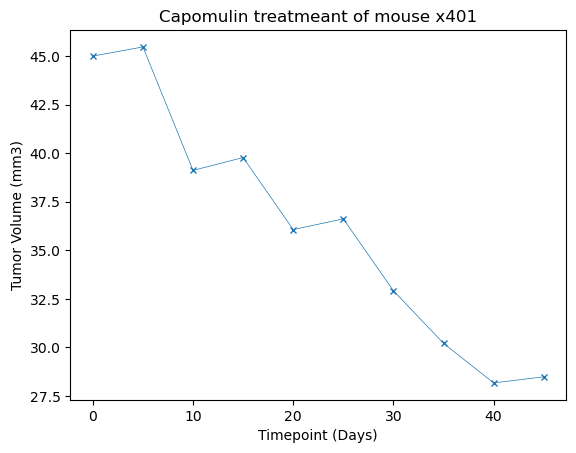

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "x401",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse x401')
plt.plot(x_axis, tumsiz,linewidth=0.5, markersize=5,marker="x", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

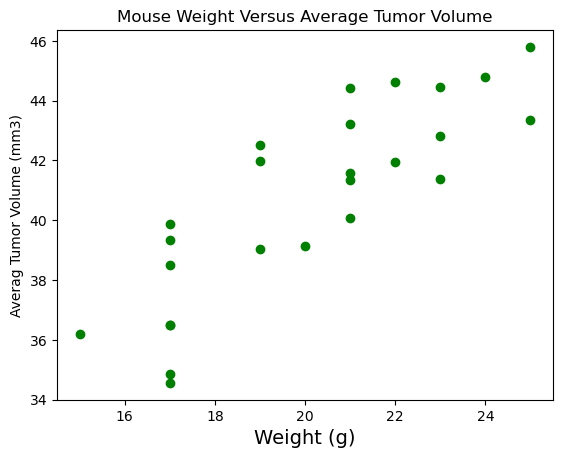

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capm_vol = Capomulin_df.groupby(['Mouse ID'], as_index=False).mean()
marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color="g")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')
plt.show()

# Calculate Correlation and Regression

In [25]:
# Calculate the correlation and regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


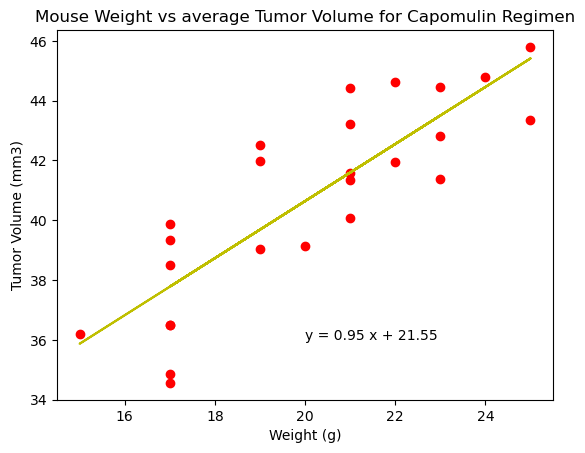

In [26]:
# Add the linear regression equation and line to plot
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)= linregress(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
regress_values=avg_capm_vol["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"],color='r')
plt.plot(avg_capm_vol["Weight (g)"], regress_values, color='y')
plt.annotate(line_eq,(20,36), fontsize=10)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight vs average Tumor Volume for Capomulin Regimen")
plt.show()